In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Home DataFrame

In [3]:
home_df = pd.read_csv('home_page_table.csv')

In [13]:
print('Number of logged rows: %s' % len(home_df))
print('Number of unique users: %s' % len(home_df['user_id'].unique()))

Number of logged rows: 90400
Number of unique users: 90400


### User DataFrame

In [14]:
user_df = pd.read_csv('user_table.csv')

In [29]:
print(min(user_df['date']))
print(max(user_df['date']))

2015-01-01
2015-04-30


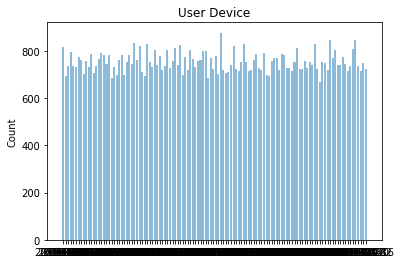

In [93]:
user_df_date = pd.DataFrame({'date': list(user_df['date']),'count':list(user_df.groupby('date')['date'].transform('count'))}).drop_duplicates()

date = user_df_date['date'].unique()
y_pos = np.arange(len(date))
count = user_df_date['count']

plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, date)
plt.ylabel('Count')
plt.title('User Device')
plt.show()

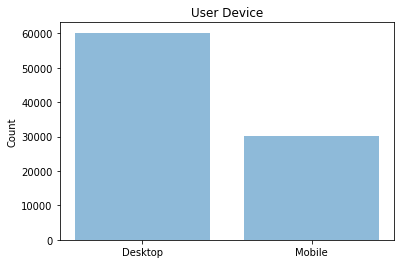

In [73]:
device = ['Desktop','Mobile']
y_pos = np.arange(len(device))
performance = [len(user_df[user_df['device'] == 'Desktop']),len(user_df[user_df['device'] == 'Mobile'])]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, device)
plt.ylabel('Count')
plt.title('User Device')
plt.show()

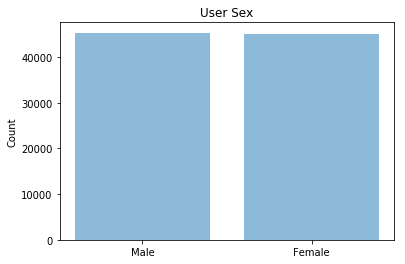

In [74]:
sex = ('Male','Female')
y_pos = np.arange(len(sex))
performance = [len(user_df[user_df['sex'] == 'Male']),len(user_df[user_df['sex'] == 'Female'])]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, sex)
plt.ylabel('Count')
plt.title('User Sex')
plt.show()